### <div class="alert alert-info"> <b> Определение перспективного тарифа для телеком компании </b></div>
 <div class="alert alert-info">
 1) Цель проекта - сравнить 2 тарифа компании сотовой связи "Мегалайн" - Смарт и Ультра - и выявить какой тариф более выгоден для компании;
    
 2) Источник исследования - небольшая выборка использования услуг сотовой связи по 500 абонентам из разных городов за 2018 год;
    
 3) Данные находятся в 5 файлах - общая информация о пользователях, использование интернета, информация по звонкам, смс и стоимость тарифов;
    
 4) Также нужно проанализировать поведение абонента - сколько звонков он делает, сколько смс отправляет, как расходует интернет
    
 5) Этапы работы: 
-  изучить файлы, проверить их на ошибки, пропуски, при необходимости их заменить, исключить строки с нулевыми значениями;
-  сгруппировать таблицы по пользователям и месяцам;
- объединить все 5 таблиц в одну;
- расчитать доход по каждому абоненту в месяц;
- провести исследование поведения абонентов, вычислить среднее, дисперсию, стандартное отклонение;
- проверить гипотезы о доходности обоих тарифов
    
</div>

## 1. Открыть файлы и изучить общую информацию

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_sms = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


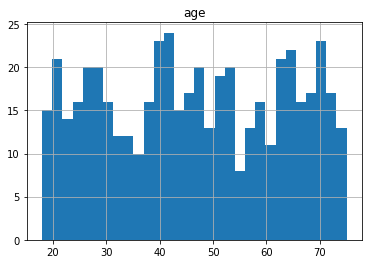

In [5]:
df_users.hist('age', bins = 30);

In [6]:
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

С возрастом ошибок нет и возрастные группы равномерные

In [7]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


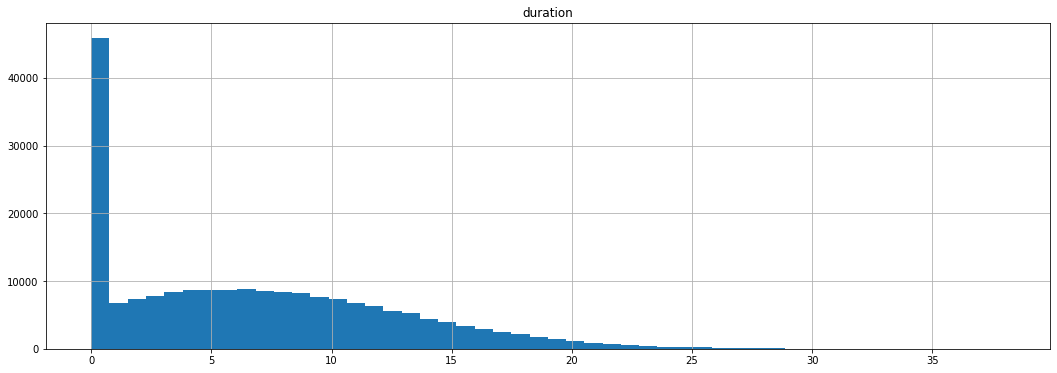

In [10]:
df_calls.hist('duration', figsize = (18,6), bins=50);

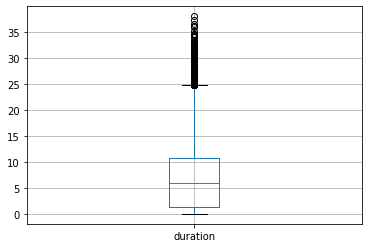

In [11]:
df_calls.boxplot('duration');

In [12]:
df_calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

19% (39613) строк с 0 значением длительности звонка

In [13]:
df_sms.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [17]:
(df_internet.query('mb_used ==0')).count() / len(df_internet['mb_used'])

Unnamed: 0      0.131182
id              0.131182
mb_used         0.131182
session_date    0.131182
user_id         0.131182
dtype: float64

13% - 0-х значений трафика

In [18]:
df_internet = df_internet.drop('Unnamed: 0', axis = 1)

In [19]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [20]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Итоги по первому этапу:

1.Явных ошибок в файлах не обнаружено - возраст, а так же минимальные, максимальный, средние значения показателей в норме
    
2.Обнаружены нулевые значения в показателях длительности звонков(19%) и интернет трафик(13%), что искажает средние значения;

3.Пропусков в данных нет;
    
4.Удален столбец Unnamed: 0, т.к., он дублирует индекс 



## Шаг 2. Подготовка данных
 - Привести данные к нужным типам;
 - Исправить ошибки в данных.

 Добавляем столбец с месяцем во все таблицы:

In [21]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d') 
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') 
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'], format='%Y-%m-%d') 
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d') 

In [22]:
df_users['reg_month'] = df_users['reg_date'].dt.month
df_users['churn_month'] = df_users['churn_date'].dt.month
df_calls['month'] = df_calls['call_date'].dt.month
df_sms['month'] = df_sms['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,NaN
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,NaN
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN


In [23]:
df_users[((df_users['churn_month'] - df_users['reg_month'])<=0) & df_users['churn_month']>0]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12.0
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12.0


Сделана проверка что месяц подключения тарифа не позже месяца прекращения обслуживания,
в выборке оказалось 2 строки, с этими данными все ок - тариф отключили через несколько дней после подключения 


Ошибки в датах нет

Заменяем NAN на 0:

In [24]:
df_users['churn_date'].fillna(0,inplace =True)
df_users['churn_month'].fillna(0,inplace =True)

df_users['churn_date']

0                        0
1                        0
2                        0
3                        0
4                        0
              ...         
495                      0
496                      0
497                      0
498    2018-10-25 00:00:00
499                      0
Name: churn_date, Length: 500, dtype: object

обнаружены 'странности' датасетов - нулевые значений длительности звонков (19%) и нулевые значения трафика интернета (13%). Идентифицируем эти строки в отдельном столбце:

In [25]:
df_calls['duration_0'] = 0
df_calls.loc[df_calls['duration']==0, 'duration_0' ] =1
df_calls['duration_0'].sum()

39613

In [26]:
df_internet['mb_used_0'] = 0
df_internet.loc[df_internet['mb_used']==0, 'mb_used_0' ] =1
df_internet['mb_used_0'].sum()

19598

## Шаг 2. Подготовка данных

Посчитать для каждого пользователя: 
  - количество сделанных звонков и израсходованных минут разговора по месяцам; 
  - количество отправленных сообщений по месяцам; 
  - объем израсходованного интернет-трафика по месяцам; 
  - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет, трафикаостаток умножьте на значение из тарифного плана, прибавьте абонентскую плату, соответствующую тарифному плану).

Для таблиц звонки, интернет и смс делаем 1) сводные по месяцам, 2) сводные по пользователям:

Для таблиц звонки и интернет сделаем 2 дополнительных варианта сводных - для всего датасета и для датасета без нулевых звонков и сессий трафика 

Округляем вверх значения потраченных минут и гигабайт:


In [27]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_internet ['mb_used'] = df_internet ['mb_used'].apply(np.ceil)
df_calls['duration']
df_internet ['mb_used']

0          113.0
1         1053.0
2         1198.0
3          551.0
4          303.0
           ...  
149391     319.0
149392     491.0
149393       0.0
149394    1247.0
149395     545.0
Name: mb_used, Length: 149396, dtype: float64

In [28]:
df_calls_by_months = df_calls.pivot_table(index = \
['user_id', 'month'], values = 'duration', aggfunc = ['sum','count', 'mean', 'median']).reset_index()
df_calls_by_months

,user_id,month,sum,count,mean,median
,,,duration,duration,duration,duration
0,1000,5,159.0,22,7.227273,7.5
1,1000,6,172.0,43,4.000000,3.0
2,1000,7,340.0,47,7.234043,7.0
3,1000,8,408.0,52,7.846154,7.5
4,1000,9,466.0,58,8.034483,8.0
...,...,...,...,...,...,...
3169,1498,10,247.0,41,6.024390,5.0
3170,1499,9,70.0,9,7.777778,5.0
3171,1499,10,449.0,68,6.602941,7.0


In [29]:
df_calls_by_months.columns = ['user_id', 'month', 'duration_sum', 'duration_count', 'duration_mean', 'duration_median']
df_calls_by_months

,user_id,month,duration_sum,duration_count,duration_mean,duration_median
0,1000,5,159.0,22,7.227273,7.5
1,1000,6,172.0,43,4.000000,3.0
2,1000,7,340.0,47,7.234043,7.0
3,1000,8,408.0,52,7.846154,7.5
4,1000,9,466.0,58,8.034483,8.0
...,...,...,...,...,...,...
3169,1498,10,247.0,41,6.024390,5.0
3170,1499,9,70.0,9,7.777778,5.0
3171,1499,10,449.0,68,6.602941,7.0
3172,1499,11,612.0,74,8.270270,8.0


In [30]:
df_calls_excl_0 = df_calls.loc[df_calls['duration_0'] ==0] 

df_calls_by_months_excl_0 = df_calls_excl_0.pivot_table(index = \
['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count', 'mean', 'median']).reset_index()

df_calls_by_months_excl_0.columns = ['user_id', 'month', 'duration_sum', 'duration_count', 'duration_mean', 'duration_median']
df_calls_by_months_excl_0

,user_id,month,duration_sum,duration_count,duration_mean,duration_median
0,1000,5,159.0,17,9.352941,9.0
1,1000,6,172.0,28,6.142857,5.0
2,1000,7,340.0,41,8.292683,8.0
3,1000,8,408.0,42,9.714286,8.5
4,1000,9,466.0,46,10.130435,9.0
...,...,...,...,...,...,...
3163,1498,10,247.0,30,8.233333,9.0
3164,1499,9,70.0,8,8.750000,6.5
3165,1499,10,449.0,44,10.204545,9.0
3166,1499,11,612.0,62,9.870968,10.0


In [31]:
df_calls_by_user_id = df_calls.pivot_table(index = \
'user_id', values='duration',  aggfunc = ['sum','count', 'mean', 'median']).reset_index()
df_calls_by_user_id

,user_id,sum,count,mean,median
,,duration,duration,duration,duration
0,1000,2566.0,368,6.972826,6.0
1,1001,844.0,122,6.918033,6.0
2,1002,1517.0,217,6.990783,6.0
3,1003,3822.0,520,7.350000,6.0
4,1004,987.0,176,5.607955,4.0
...,...,...,...,...,...
487,1495,3920.0,565,6.938053,6.0
488,1496,5984.0,828,7.227053,6.0
489,1497,1406.0,201,6.995025,7.0


In [32]:
df_calls_by_user_id_excl_0 = df_calls_excl_0.pivot_table(index = \
'user_id', values='duration',  aggfunc = ['sum','count', 'mean', 'median']).reset_index()
df_calls_by_user_id_excl_0

,user_id,sum,count,mean,median
,,duration,duration,duration,duration
0,1000,2566.0,293,8.757679,8.0
1,1001,844.0,92,9.173913,9.0
2,1002,1517.0,173,8.768786,8.0
3,1003,3822.0,428,8.929907,8.0
4,1004,987.0,139,7.100719,6.0
...,...,...,...,...,...
487,1495,3920.0,466,8.412017,8.0
488,1496,5984.0,667,8.971514,8.0
489,1497,1406.0,156,9.012821,8.0


In [33]:
df_internet_by_months = df_internet.pivot_table(index = \
['user_id', 'month'], values = 'mb_used', aggfunc = ['sum', 'count', 'mean', 'median']).reset_index()
df_internet_by_months
df_internet_by_user_id = df_internet.pivot_table(index ='user_id', values='mb_used',  aggfunc = ['sum','count', 'mean', 'median']).reset_index()
df_internet_by_user_id
df_internet_by_months

,user_id,month,sum,count,mean,median
,,,mb_used,mb_used,mb_used,mb_used
0,1000,5,2256.0,5,451.200000,545.0
1,1000,6,23257.0,49,474.632653,460.0
2,1000,7,14016.0,29,483.310345,519.0
3,1000,8,14070.0,29,485.172414,477.0
4,1000,9,14581.0,27,540.037037,547.0
...,...,...,...,...,...,...
3198,1498,10,20604.0,59,349.220339,321.0
3199,1499,9,1848.0,5,369.600000,340.0
3200,1499,10,17809.0,58,307.051724,254.0


In [34]:
df_internet_by_months.columns = ['user_id', 'month','mb_used_sum','mb_used_count', 'mb_used_mean', 'mb_used_median']
df_internet_by_months

,user_id,month,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median
0,1000,5,2256.0,5,451.200000,545.0
1,1000,6,23257.0,49,474.632653,460.0
2,1000,7,14016.0,29,483.310345,519.0
3,1000,8,14070.0,29,485.172414,477.0
4,1000,9,14581.0,27,540.037037,547.0
...,...,...,...,...,...,...
3198,1498,10,20604.0,59,349.220339,321.0
3199,1499,9,1848.0,5,369.600000,340.0
3200,1499,10,17809.0,58,307.051724,254.0
3201,1499,11,17984.0,49,367.020408,318.0


In [35]:
df_internet_excl_0 = df_internet.loc[df_internet['mb_used_0'] ==0]


In [36]:
df_internet_by_months_excl_0 = df_internet_excl_0.pivot_table(index = \
['user_id', 'month'], values = 'mb_used', aggfunc = ['sum','count', 'mean', 'median']).reset_index()
df_internet_by_months_excl_0.columns = ['user_id', 'month','mb_used_sum','mb_used_count', 'mb_used_mean', 'mb_used_median']
df_internet_by_months_excl_0
df_internet_by_user_id_excl_0 = df_internet_excl_0.pivot_table(index = \
'user_id', values='mb_used',  aggfunc = ['sum','count', 'mean', 'median']).reset_index()
df_internet_by_user_id_excl_0

,user_id,sum,count,mean,median
,,mb_used,mb_used,mb_used,mb_used
0,1000,107492.0,197,545.644670,548.0
1,1001,32505.0,82,396.402439,367.5
2,1002,116183.0,297,391.188552,383.0
3,1003,57329.0,102,562.049020,538.0
4,1004,149172.0,278,536.589928,506.5
...,...,...,...,...,...
492,1495,127536.0,244,522.688525,525.5
493,1496,271269.0,693,391.441558,375.0
494,1497,45626.0,105,434.533333,427.0


In [37]:
df_sms_by_months = df_sms.pivot_table(index = \
['user_id', 'month'], aggfunc = ['count']).reset_index()


df_sms_by_months

user_id month count             
                      id message_date
0       1000     5    22           22
1       1000     6    60           60
2       1000     7    75           75
3       1000     8    81           81
4       1000     9    57           57
...      ...   ...   ...          ...
2712    1498    10    42           42
2713    1499     9    11           11
2714    1499    10    48           48
2715    1499    11    59           59
2716    1499    12    66           66

[2717 rows x 4 columns]

In [38]:
df_sms_by_months.columns = ['user_id', 'month', 'sms_count', 'sms_count1']
df_sms_by_months = df_sms_by_months.drop('sms_count1', axis = 1)
df_sms_by_months

,user_id,month,sms_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [39]:
df_sms_by_user_id = df_sms_by_months.pivot_table(index ='user_id', values = 'sms_count',aggfunc =['mean']).reset_index()
df_sms_by_user_id

,user_id,mean
,,sms_count
0,1000,62.0
1,1002,10.0
2,1003,76.0
3,1004,149.0
4,1005,46.0
...,...,...
421,1495,68.0
422,1496,39.0
423,1497,17.0


In [40]:
df_sms_by_user_id.columns = ['user_id', 'Qty_sms_mean']

In [41]:
df_sms_by_user_id

,user_id,Qty_sms_mean
0,1000,62.0
1,1002,10.0
2,1003,76.0
3,1004,149.0
4,1005,46.0
...,...,...
421,1495,68.0
422,1496,39.0
423,1497,17.0
424,1498,42.0


Объединим таблицы в одну (по месяцам):

In [42]:
df_calls_by_months.merge(df_internet_by_months, on = ['user_id','month'], how = 'outer')

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median
0,1000,5,159.0,22.0,7.227273,7.5,2256.0,5.0,451.200000,545.0
1,1000,6,172.0,43.0,4.000000,3.0,23257.0,49.0,474.632653,460.0
2,1000,7,340.0,47.0,7.234043,7.0,14016.0,29.0,483.310345,519.0
3,1000,8,408.0,52.0,7.846154,7.5,14070.0,29.0,485.172414,477.0
4,1000,9,466.0,58.0,8.034483,8.0,14581.0,27.0,540.037037,547.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,NaN,NaN,11066.0,34.0,325.470588,320.0
3210,1489,9,NaN,NaN,NaN,NaN,17232.0,63.0,273.523810,167.0
3211,1489,10,NaN,NaN,NaN,NaN,19588.0,63.0,310.920635,321.0
3212,1489,11,NaN,NaN,NaN,NaN,17516.0,55.0,318.472727,278.0


In [43]:
df_total_per_months = df_calls_by_months.merge(df_internet_by_months, on = ['user_id','month'], how = 'outer')\
.merge(df_sms_by_months,on = ['user_id','month'], how = 'outer')

In [44]:
df_with_0 = df_total_per_months.merge(df_users, on = 'user_id', how = 'outer')
df_with_0

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median,sms_count,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,5.0,159.0,22.0,7.227273,7.5,2256.0,5.0,451.200000,545.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
1,1000,6.0,172.0,43.0,4.000000,3.0,23257.0,49.0,474.632653,460.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
2,1000,7.0,340.0,47.0,7.234043,7.0,14016.0,29.0,483.310345,519.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
3,1000,8.0,408.0,52.0,7.846154,7.5,14070.0,29.0,485.172414,477.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
4,1000,9.0,466.0,58.0,8.034483,8.0,14581.0,27.0,540.037037,547.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,NaN,NaN,19588.0,63.0,310.920635,321.0,21.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8,0.0
3212,1489,11.0,NaN,NaN,NaN,NaN,17516.0,55.0,318.472727,278.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8,0.0
3213,1489,12.0,NaN,NaN,NaN,NaN,17341.0,51.0,340.019608,307.0,35.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8,0.0
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12.0


Посчитаем, сколько потратил на сотовую связь каждый пользователь по месяцам:

In [45]:
df_with_0 = df_with_0.merge(df_tariffs, left_on='tariff', right_on = 'tariff_name')

In [46]:
df_with_0['mb_used_sum_Gb'] = df_with_0['mb_used_sum']/1024
df_with_0

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median,...,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_used_sum_Gb
0,1000,5.0,159.0,22.0,7.227273,7.5,2256.0,5.0,451.200000,545.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,2.203125
1,1000,6.0,172.0,43.0,4.000000,3.0,23257.0,49.0,474.632653,460.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,22.711914
2,1000,7.0,340.0,47.0,7.234043,7.0,14016.0,29.0,483.310345,519.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,13.687500
3,1000,8.0,408.0,52.0,7.846154,7.5,14070.0,29.0,485.172414,477.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,13.740234
4,1000,9.0,466.0,58.0,8.034483,8.0,14581.0,27.0,540.037037,547.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,14.239258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,NaN,NaN,17232.0,63.0,273.523810,167.0,...,0.0,50,15360,500,550,200,3,3,smart,16.828125
3212,1489,10.0,NaN,NaN,NaN,NaN,19588.0,63.0,310.920635,321.0,...,0.0,50,15360,500,550,200,3,3,smart,19.128906
3213,1489,11.0,NaN,NaN,NaN,NaN,17516.0,55.0,318.472727,278.0,...,0.0,50,15360,500,550,200,3,3,smart,17.105469
3214,1489,12.0,NaN,NaN,NaN,NaN,17341.0,51.0,340.019608,307.0,...,0.0,50,15360,500,550,200,3,3,smart,16.934570


In [47]:
df_with_0.fillna(0, inplace = True)

In [48]:
df_with_0['rub_monthly_spent'] = df_with_0['rub_monthly_fee']

df_with_0.loc[df_with_0['duration_sum'] > df_with_0['minutes_included'], 'rub_monthly_spent']\
= df_with_0['rub_monthly_spent'] + (df_with_0['duration_sum'] - df_with_0['minutes_included'])*df_with_0['rub_per_minute']

df_with_0.loc[df_with_0['mb_used_sum_Gb']> df_with_0['mb_per_month_included']/1024, 'rub_monthly_spent']\
= df_with_0['rub_monthly_spent'] + (df_with_0['mb_used_sum_Gb'] - df_with_0['mb_per_month_included']/1024)* df_with_0['rub_per_gb']

df_with_0.loc[df_with_0['sms_count'] > df_with_0['messages_included'], 'rub_monthly_spent']\
= df_with_0['rub_monthly_spent'] + (df_with_0['sms_count'] - df_with_0['messages_included'])* df_with_0['rub_per_message']

In [49]:
df_with_0.sort_values('rub_monthly_spent')

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_used_sum_Gb,rub_monthly_spent
3215,1371,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,50,15360,500,550,200,3,3,smart,0.000000,550.000000
2672,1383,10.0,101.0,11.0,9.181818,10.0,3565.0,12.0,297.083333,315.5,...,50,15360,500,550,200,3,3,smart,3.481445,550.000000
1944,1206,12.0,106.0,16.0,6.625000,6.0,8630.0,22.0,392.272727,417.5,...,50,15360,500,550,200,3,3,smart,8.427734,550.000000
2674,1383,12.0,285.0,41.0,6.951220,6.0,10046.0,33.0,304.424242,333.0,...,50,15360,500,550,200,3,3,smart,9.810547,550.000000
2675,1384,4.0,85.0,12.0,7.083333,8.5,529.0,5.0,105.800000,0.0,...,50,15360,500,550,200,3,3,smart,0.516602,550.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1286,12.0,739.0,95.0,7.778947,8.0,35151.0,110.0,319.554545,284.5,...,50,15360,500,550,200,3,3,smart,34.327148,5186.429688
3157,1486,11.0,764.0,108.0,7.074074,7.0,36319.0,109.0,333.201835,303.0,...,50,15360,500,550,200,3,3,smart,35.467773,5573.554688
1184,1042,12.0,728.0,121.0,6.016529,5.0,37219.0,112.0,332.312500,340.0,...,50,15360,500,550,200,3,3,smart,36.346680,5578.335938
2178,1261,12.0,1074.0,141.0,7.617021,7.0,32697.0,114.0,286.815789,270.5,...,50,15360,500,550,200,3,3,smart,31.930664,5658.132812


In [50]:
df_with_0['rub_monthly_spent'].astype('int')

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
3211     915
3212    1375
3213     971
3214     936
3215     550
Name: rub_monthly_spent, Length: 3216, dtype: int32

In [51]:
df_with_0[['user_id','month', 'rub_monthly_spent']].sort_values('rub_monthly_spent')

,user_id,month,rub_monthly_spent
3215,1371,0.0,550.000000
2672,1383,10.0,550.000000
1944,1206,12.0,550.000000
2674,1383,12.0,550.000000
2675,1384,4.0,550.000000
...,...,...,...
2299,1286,12.0,5186.429688
3157,1486,11.0,5573.554688
1184,1042,12.0,5578.335938
2178,1261,12.0,5658.132812


Составим аналогичную общую таблицу **без нулевых** значений звонков и интрнет трафика:

In [52]:
df_calls_by_months_excl_0.merge(df_internet_by_months_excl_0, on = ['user_id','month'], how = 'outer')

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median
0,1000,5,159.0,17.0,9.352941,9.0,2256.0,4.0,564.000000,587.0
1,1000,6,172.0,28.0,6.142857,5.0,23257.0,44.0,528.568182,501.0
2,1000,7,340.0,41.0,8.292683,8.0,14016.0,28.0,500.571429,520.5
3,1000,8,408.0,42.0,9.714286,8.5,14070.0,27.0,521.111111,522.0
4,1000,9,466.0,46.0,10.130435,9.0,14581.0,25.0,583.240000,548.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,NaN,NaN,11066.0,28.0,395.214286,354.0
3210,1489,9,NaN,NaN,NaN,NaN,17232.0,49.0,351.673469,300.0
3211,1489,10,NaN,NaN,NaN,NaN,19588.0,52.0,376.692308,358.5
3212,1489,11,NaN,NaN,NaN,NaN,17516.0,45.0,389.244444,333.0


In [53]:
df_total_per_months_excl_0 = df_calls_by_months_excl_0.merge(df_internet_by_months_excl_0, on = ['user_id','month'], how = 'outer')\
.merge(df_sms_by_months, on = ['user_id','month'], how = 'outer')

In [54]:
df = df_total_per_months_excl_0.merge(df_users, on = 'user_id', how = 'outer')
df.head()

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median,sms_count,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,5.0,159.0,17.0,9.352941,9.0,2256.0,4.0,564.000000,587.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
1,1000,6.0,172.0,28.0,6.142857,5.0,23257.0,44.0,528.568182,501.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
2,1000,7.0,340.0,41.0,8.292683,8.0,14016.0,28.0,500.571429,520.5,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
3,1000,8.0,408.0,42.0,9.714286,8.5,14070.0,27.0,521.111111,522.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
4,1000,9.0,466.0,46.0,10.130435,9.0,14581.0,25.0,583.240000,548.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0


In [55]:
df = df.merge(df_tariffs, left_on='tariff', right_on = 'tariff_name')

In [56]:
df['mb_used_sum_Gb'] = df['mb_used_sum']/1024
df

,user_id,month,duration_sum,duration_count,duration_mean,duration_median,mb_used_sum,mb_used_count,mb_used_mean,mb_used_median,...,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_used_sum_Gb
0,1000,5.0,159.0,17.0,9.352941,9.0,2256.0,4.0,564.000000,587.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,2.203125
1,1000,6.0,172.0,28.0,6.142857,5.0,23257.0,44.0,528.568182,501.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,22.711914
2,1000,7.0,340.0,41.0,8.292683,8.0,14016.0,28.0,500.571429,520.5,...,0.0,1000,30720,3000,1950,150,1,1,ultra,13.687500
3,1000,8.0,408.0,42.0,9.714286,8.5,14070.0,27.0,521.111111,522.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,13.740234
4,1000,9.0,466.0,46.0,10.130435,9.0,14581.0,25.0,583.240000,548.0,...,0.0,1000,30720,3000,1950,150,1,1,ultra,14.239258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,NaN,NaN,17232.0,49.0,351.673469,300.0,...,0.0,50,15360,500,550,200,3,3,smart,16.828125
3212,1489,10.0,NaN,NaN,NaN,NaN,19588.0,52.0,376.692308,358.5,...,0.0,50,15360,500,550,200,3,3,smart,19.128906
3213,1489,11.0,NaN,NaN,NaN,NaN,17516.0,45.0,389.244444,333.0,...,0.0,50,15360,500,550,200,3,3,smart,17.105469
3214,1489,12.0,NaN,NaN,NaN,NaN,17341.0,43.0,403.279070,388.0,...,0.0,50,15360,500,550,200,3,3,smart,16.934570


In [57]:
df.fillna(0, inplace = True)

In [58]:
df['rub_monthly_spent'] = df['rub_monthly_fee']

df.loc[df['duration_sum'] > df['minutes_included'], 'rub_monthly_spent']\
= df['rub_monthly_spent'] + (df['duration_sum'] - df['minutes_included'])*df['rub_per_minute']

df.loc[df['mb_used_sum_Gb']> df['mb_per_month_included']/1024, 'rub_monthly_spent']\
= df['rub_monthly_spent'] + (df['mb_used_sum_Gb'] - df['mb_per_month_included']/1024)* df['rub_per_gb']

df.loc[df['sms_count'] > df['messages_included'], 'rub_monthly_spent']\
= df['rub_monthly_spent'] + (df['sms_count'] - df['messages_included'])* df['rub_per_message']

In [59]:
df[['user_id','month', 'rub_monthly_spent']].sort_values('rub_monthly_spent')

,user_id,month,rub_monthly_spent
3215,1371,0.0,550.000000
2672,1383,10.0,550.000000
1944,1206,12.0,550.000000
2674,1383,12.0,550.000000
2675,1384,4.0,550.000000
...,...,...,...
2299,1286,12.0,5186.429688
3157,1486,11.0,5573.554688
1184,1042,12.0,5578.335938
2178,1261,12.0,5658.132812


In [60]:
df['rub_monthly_spent'].astype('int')

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
3211     915
3212    1375
3213     971
3214     936
3215     550
Name: rub_monthly_spent, Length: 3216, dtype: int32

Сделано на шаге подготовка данных:

1. В соответствии условиями тарифов длительность звонков и интернет трафик округлены вверх;
2. Данные таблиц звонки, интернет и сообщения агрегированы по пользователям и месяцам;
3. Данные всех 5 таблиц объединены в одну;
4. Рассчитан показатель - сколько абонент фактически потратил на связь в месяц с учетом превышения лимитов по тарифу.


## Шаг 3. Анализ данных
 - Описать поведение клиентов оператора, исходя из выборки. 
 - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
 - Посчитать среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Берем таблицу без нулей, т.к., нулевые значения сильно искажают среднее и делать выводы с учетом нулевых значений в данном случае не имеет никакого смысла


In [61]:
df_pivot_users = df.pivot_table(index =['user_id','tariff', 'age', 'city'], values=['duration_sum','duration_count', 'duration_median', 'mb_used_sum', 'mb_used_median', 'sms_count', 'rub_monthly_spent'], \
aggfunc = ('median')).reset_index()
df_pivot_users['age_gr'] = pd.cut(df_pivot_users['age'], 6)
df_pivot_users

,user_id,tariff,age,city,duration_count,duration_median,duration_sum,mb_used_median,mb_used_sum,rub_monthly_spent,sms_count,age_gr
0,1000,ultra,52,Краснодар,39.5,8.00,339.0,556.00,14325.5,1950.000000,65.0,"(46.5, 56.0]"
1,1001,smart,41,Москва,46.0,9.00,422.0,373.50,16252.5,851.953125,0.0,"(37.0, 46.5]"
2,1002,smart,59,Стерлитамак,25.0,8.00,214.0,383.00,17601.0,987.695312,11.0,"(56.0, 65.5]"
3,1003,ultra,23,Москва,95.0,8.00,824.0,534.50,11368.0,1950.000000,83.0,"(17.943, 27.5]"
4,1004,ultra,68,Новокузнецк,18.0,6.25,132.5,505.50,17828.5,1950.000000,154.5,"(65.5, 75.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,65,Иркутск,112.0,8.00,954.0,535.50,29393.0,1950.000000,82.0,"(56.0, 65.5]"
496,1496,smart,36,Вологда,60.0,8.25,524.0,375.50,24067.5,2396.605469,41.5,"(27.5, 37.0]"
497,1497,smart,32,Челябинск,50.0,8.50,490.0,437.00,14174.0,550.000000,17.0,"(27.5, 37.0]"
498,1498,smart,68,Владикавказ,36.5,9.50,323.5,367.25,21385.0,1726.757812,43.0,"(65.5, 75.0]"


In [62]:
df_pivot_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Посмотрим параметры по городам в 3-х группах: Москва, Санкт-Петербург и прочие города

In [63]:
a = df_pivot_users['city'].value_counts().head(20)
a.index

Index(['Москва', 'Санкт-Петербург', 'Новосибирск', 'Омск', 'Казань', 'Уфа',
       'Краснодар', 'Набережные Челны', 'Ульяновск', 'Екатеринбург',
       'Челябинск', 'Самара', 'Нижний Новгород', 'Волгоград', 'Пермь',
       'Улан-Удэ', 'Новокузнецк', 'Вологда', 'Красноярск', 'Сочи'],
      dtype='object')

In [64]:
z = df_pivot_users.query("city in @a.index")

In [65]:
a = z['city'].value_counts().reset_index()
a.columns = ['city', 'Qty_users']
a

,city,Qty_users
0,Москва,99
1,Санкт-Петербург,39
2,Новосибирск,16
3,Казань,14
4,Омск,14
5,Уфа,12
6,Екатеринбург,11
7,Краснодар,11
8,Ульяновск,11
9,Набережные Челны,11


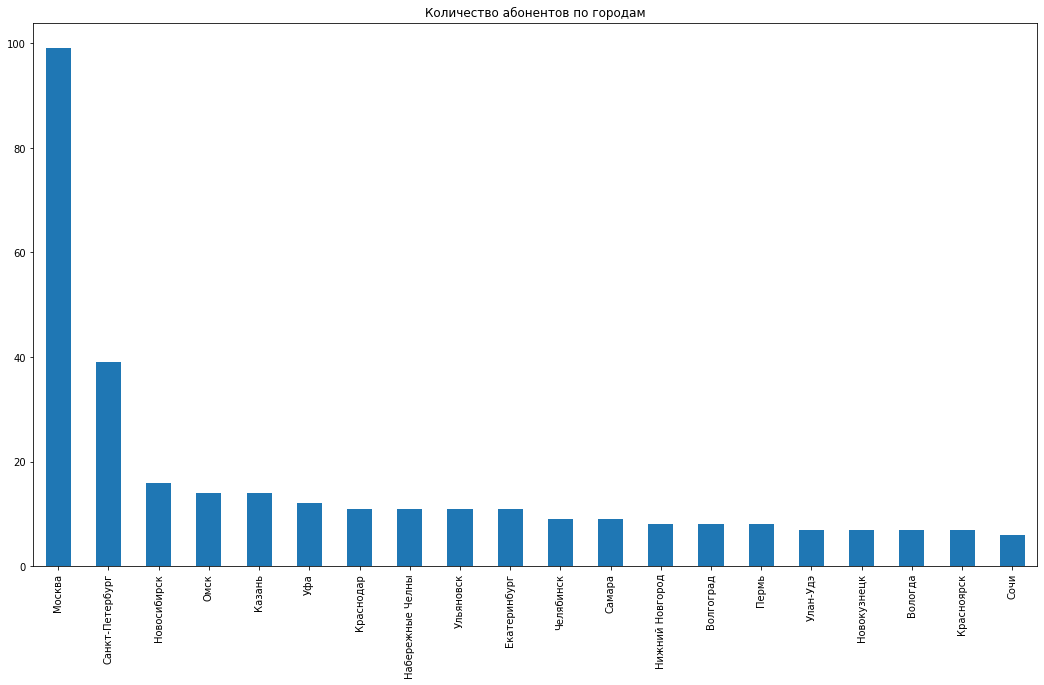

In [66]:
plt.figure(figsize=(18,10))
a = df_pivot_users['city'].value_counts().head(20)

a.plot.bar(title = 'Количество абонентов по городам');

Распределение абонентов по городам в выборке: почти 20% Москва, 8% - Санкт-Петербург, доля остальных городов менее 3% (для каждого). Поэтому прочие города в отдельности смотреть не интересно, они не значительны в выборке.


Посмотрим параметры по городам в 3-х группах: Москва, Санкт-Петербург и прочие города:

In [67]:
def city_gr(row):
    if row['city'] == 'Москва' or row['city'] == 'Санкт-Петербург' :
        return row['city']
    else:
        return 'Прочие города'
    
df_pivot_users['city_gr'] = df_pivot_users.apply(city_gr, axis=1) 
df_pivot_users.head()

,user_id,tariff,age,city,duration_count,duration_median,duration_sum,mb_used_median,mb_used_sum,rub_monthly_spent,sms_count,age_gr,city_gr
0,1000,ultra,52,Краснодар,39.5,8.00,339.0,556.0,14325.5,1950.000000,65.0,"(46.5, 56.0]",Прочие города
1,1001,smart,41,Москва,46.0,9.00,422.0,373.5,16252.5,851.953125,0.0,"(37.0, 46.5]",Москва
2,1002,smart,59,Стерлитамак,25.0,8.00,214.0,383.0,17601.0,987.695312,11.0,"(56.0, 65.5]",Прочие города
3,1003,ultra,23,Москва,95.0,8.00,824.0,534.5,11368.0,1950.000000,83.0,"(17.943, 27.5]",Москва
4,1004,ultra,68,Новокузнецк,18.0,6.25,132.5,505.5,17828.5,1950.000000,154.5,"(65.5, 75.0]",Прочие города


In [68]:
val = ('duration_count', 'duration_median', 'duration_sum', 'mb_used_median', 'mb_used_sum', 'rub_monthly_spent','sms_count')

In [69]:
df_pivot_users1 = df_pivot_users.pivot_table(index = 'city_gr', columns = 'tariff', values = 'user_id', aggfunc = 'count').reset_index()

df_pivot_users1['%_ultra'] = df_pivot_users1['ultra']/(df_pivot_users1['ultra'] + df_pivot_users1['smart'])
df_pivot_users1

tariff,city_gr,smart,ultra,%_ultra
0,Москва,67,32,0.323232
1,Прочие города,254,108,0.298343
2,Санкт-Петербург,30,9,0.230769


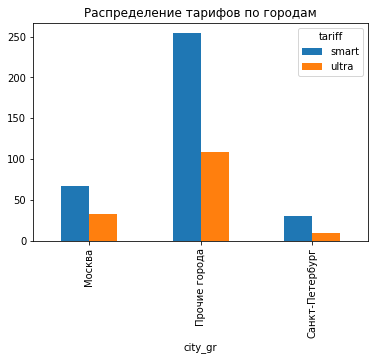

In [70]:
df_pivot_users.pivot_table(index = 'city_gr', columns = 'tariff', values = 'user_id', aggfunc = 'count').plot(kind='bar', title = 'Распределение тарифов по городам');

In [71]:
df_pivot_users.pivot_table(index = 'city_gr', values = val, aggfunc = 'median').reset_index()

,city_gr,duration_count,duration_median,duration_sum,mb_used_median,mb_used_sum,rub_monthly_spent,sms_count
0,Москва,54.00,8.0,491.0,380.000,17220.0,1518.164062,28.5
1,Прочие города,50.75,8.0,453.0,371.125,17367.0,1454.298828,34.5
2,Санкт-Петербург,56.50,8.0,483.5,363.000,18358.0,1682.117188,21.0


In [72]:
df_pivot_users.pivot_table(index = ['tariff','city_gr'], values = val, aggfunc = 'median').reset_index()

,tariff,city_gr,duration_count,duration_median,duration_sum,mb_used_median,mb_used_sum,rub_monthly_spent,sms_count
0,smart,Москва,49.50,8.0,423.0,365.000,16252.50,942.757812,26.00
1,smart,Прочие города,49.75,8.0,443.5,355.500,16948.00,1051.847656,30.50
2,smart,Санкт-Петербург,50.75,8.0,441.0,359.500,18342.25,1348.015625,24.25
3,ultra,Москва,68.00,8.0,587.0,516.250,21497.50,1950.000000,57.25
4,ultra,Прочие города,57.25,8.0,500.5,519.875,19220.00,1950.000000,47.25
5,ultra,Санкт-Петербург,71.50,8.0,646.0,522.500,19058.00,1950.000000,21.00


По таблицам можно оценить отличия абонентов Москвы, Санкт-Петербурга, прочих городов:
 - из 500 абонентов 99 из Москвы;
 - доля абонентов ультра больше в Москве - 32%, но неожиданно низкая в Санкт-Петербурге - всего 23%;
 - длительность звонка во всех группах одинаковая 7,7 - 7,8 мин;
 - В Санкт-Петербурге тратят чуть больше трафика интернета и в среднем тратят больше денег на оплату мобильной связи;
 - В прочих городахпишут больше смс, а в Санкт-Петербурге мньше - 34,5 vs 21;
 - В тарифе смарт питерцы выходят за лимитный трафик интернета, и поэтому их затраты выше

Сравним 2 тарифа:

In [73]:
df_pivot1 = df.pivot_table(index = 'tariff', values=val, aggfunc = ('median'), margins=True).transpose()
df_pivot1 ['diff_%'] = df_pivot1 ['smart'] / df_pivot1 ['ultra']-1
df_pivot1 ['diff'] = df_pivot1 ['smart'] - df_pivot1 ['ultra']
df_pivot1


tariff,smart,ultra,All,diff_%,diff
duration_count,47.000000,58.00,50.000000,-0.189655,-11.000000
duration_median,8.000000,8.00,8.000000,0.000000,0.000000
duration_sum,421.500000,518.00,443.000000,-0.186293,-96.500000
mb_used_median,359.000000,517.25,385.500000,-0.305945,-158.250000
mb_used_sum,16529.000000,19320.00,16962.000000,-0.144462,-2791.000000
rub_monthly_spent,959.546875,1950.00,1563.175781,-0.507925,-990.453125
sms_count,28.000000,38.00,30.000000,-0.263158,-10.000000


Пользователи тарифа смарт делают на 11 звонков в месяц меньше (-90 мин), но продолжительность звонков одинаковая - 7-8 мин. Смартовцы всего на 15% меньше используют интернет трафика, отправляют на 26% меньше смс, и тратят на связь на 50% меньше - 925р vs 1950р

Строим гистограммы:

In [74]:
df_calls_excl_0 = df_calls.query('duration>0')

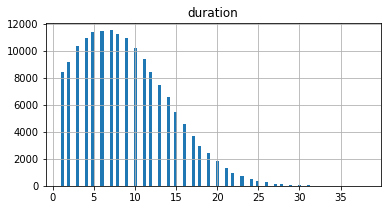

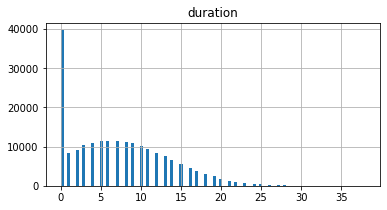

In [75]:
df_calls_excl_0.hist('duration', bins = 100, figsize=(6,3));
df_calls.hist('duration', bins = 100, figsize=(6,3));

In [76]:
np.var(df_calls_excl_0['duration'])

28.66258394306672

In [77]:
np.std(df_calls_excl_0['duration'])

5.35374485225685

In [78]:
df_calls_excl_0['duration'].mean()

8.897879676552511

In [79]:
df_calls['duration'].mean()

7.158197890497367

Нулевые значения влияют на среднее, например, средняяя продолжительность звонка - 8,9 мин, но если в данных оставить шум от нулей - 7,2 мин 


Распределение длительности звонков нормальное со средним 8,4 и стандартным отклонением 5,4

In [80]:
df_internet_excl0 = df_internet.query('mb_used>0')

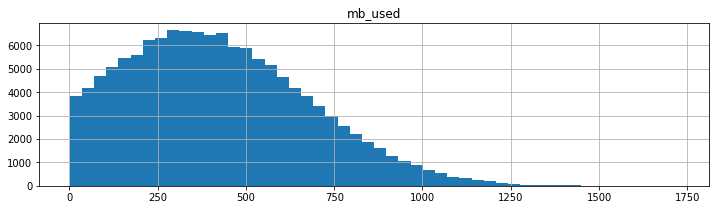

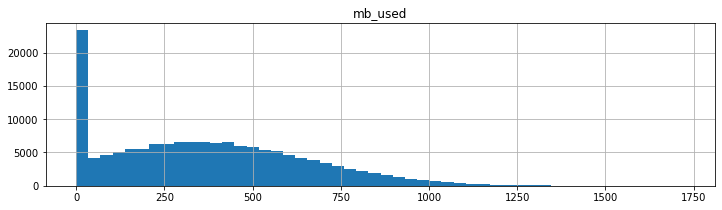

In [81]:
df_internet_excl0.hist('mb_used', bins = 50, figsize=(12,3));
df_internet.hist('mb_used', bins = 50, figsize=(12,3));

In [82]:
np.var(df_internet_excl0['mb_used'])

65328.87036692505

In [83]:
np.std(df_internet_excl0['mb_used'])

255.59512977935447

In [84]:
(df_internet_excl0['mb_used']).mean()

426.58175780828674

In [85]:
(df_internet['mb_used']).mean()

370.6220983158853

Аналогичное влияние нулевых интернет сессий на среднее, средний трафик за сессию - 426 Мб, но если в данных оставить нули - 370 Мб 


по использоваанию трафика распределение нормальное, среднее значение 426Мб, стандартное отклонение - 255, дисперсия 65329 указывает на большую вариативность в данных

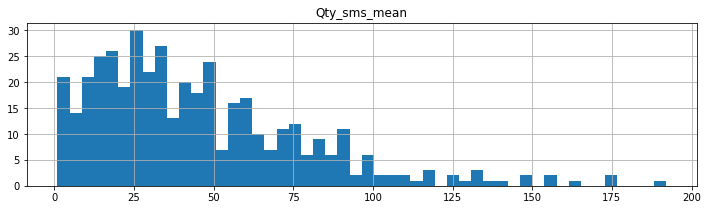

In [86]:
df_sms_by_user_id.hist('Qty_sms_mean', bins = 50, figsize = (12,3));

Дисперсия и стандартное отклонение:

In [87]:
np.var(df_sms_by_user_id['Qty_sms_mean'])

1130.1352052283837

In [88]:
np.std(df_sms_by_user_id['Qty_sms_mean'])

33.61748362427479

In [89]:
df_sms_by_user_id['Qty_sms_mean'].mean()

45.42899611473555

In [90]:
df_sms_by_user_id['Qty_sms_mean'].median()

38.0

Среднее кол-во смс в месяц 45,4, стандартное отклонение - 33,6, дисперсия 1130 говорит о значительном разбросе данных

Строим графики по месяцам:

In [91]:
df_pivot_months = df.pivot_table(index =['month', 'tariff'], values=val, aggfunc = 'median').reset_index()
df_pivot_months_sm = df_pivot_months.query('tariff=="smart"').reset_index()
df_pivot_months_sm = df_pivot_months_sm.drop(0)


df_pivot_months_ul = df_pivot_months.query('tariff=="ultra"').reset_index()
df_pivot_months_ul = df_pivot_months_ul.drop(0)

df_pivot_months_sm
df_pivot_months_ul

,index,month,tariff,duration_count,duration_median,duration_sum,mb_used_median,mb_used_sum,rub_monthly_spent,sms_count
1,3,1.0,ultra,41.0,9.0,382.0,527.00,14808.0,1950.0,32.0
2,5,2.0,ultra,21.0,8.0,168.0,494.50,7335.5,1950.0,5.5
3,7,3.0,ultra,46.0,8.0,403.0,535.00,17513.0,1950.0,20.0
4,9,4.0,ultra,53.0,8.0,453.0,513.00,16662.0,1950.0,17.0
5,11,5.0,ultra,61.0,8.0,519.0,512.00,18717.0,1950.0,25.0
6,13,6.0,ultra,54.5,8.0,479.0,516.25,19495.5,1950.0,27.5
7,15,7.0,ultra,62.0,8.0,542.0,516.00,20034.0,1950.0,38.0
8,17,8.0,ultra,57.0,8.0,500.0,531.50,18945.0,1950.0,40.0
9,19,9.0,ultra,59.0,8.0,520.0,521.00,19675.0,1950.0,43.0
10,21,10.0,ultra,60.0,8.0,533.0,520.00,20359.0,1950.0,49.0


In [92]:
df.pivot_table(index=['tariff'], columns = 'month', values='user_id', aggfunc='count').drop(0, axis=1)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
tariff,,,,,,,,,,,,
smart,34,58,77,112,141,164,201,235,260,294,316,337
ultra,9,24,37,55,67,84,91,107,115,123,134,139


In [93]:
df.pivot_table(index=['tariff'], values='rub_monthly_spent', aggfunc='sum')/1000000

,rub_monthly_spent
tariff,
smart,2.749686
ultra,2.031572


In [94]:
(df.pivot_table(index=['tariff'], columns = 'month',\
                values='rub_monthly_spent', aggfunc='sum', margins= True)/1000000).drop(0, axis=1)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,All
tariff,,,,,,,,,,,,,
smart,0.023887,0.046652,0.086115,0.103302,0.161716,0.188531,0.234781,0.295747,0.311759,0.383624,0.405543,0.507480,2.749686
ultra,0.017550,0.047353,0.074154,0.109749,0.137683,0.170693,0.191874,0.221613,0.231578,0.253001,0.278825,0.295548,2.031572
All,0.041437,0.094005,0.160270,0.213051,0.299399,0.359224,0.426655,0.517360,0.543337,0.636625,0.684368,0.803028,4.781258


In [95]:
df.pivot_table(index=['tariff'], values='rub_monthly_spent', aggfunc='mean', margins= True)

,rub_monthly_spent
tariff,
smart,1233.043032
ultra,2060.417872
All,1486.709572


In [96]:
df_by_tariff = df.pivot_table(index = 'tariff', values = ['duration_sum', 'mb_used_sum', 'sms_count'], aggfunc = 'median')
df_by_tariff['mb_used_sum'] = df_by_tariff['mb_used_sum']/1024
df_by_tariff

,duration_sum,mb_used_sum,sms_count
tariff,,,
smart,421.5,16.141602,28.0
ultra,518.0,18.867188,38.0


In [97]:
df_pivot_users.pivot_table(index = 'age_gr', columns = 'tariff', \
                           values = 'rub_monthly_spent', margins = True, aggfunc = ['median', 'count'])

median                      count           
tariff                smart   ultra          All smart ultra  All
age_gr                                                           
(17.943, 27.5]  1147.070312  1950.0  1489.294922    63    23   86
(27.5, 37.0]     961.523438  1950.0  1520.843750    54    27   81
(37.0, 46.5]     984.130859  1950.0  1594.824219    58    26   84
(46.5, 56.0]    1140.880859  1950.0  1405.000000    66    23   89
(56.0, 65.5]     939.453125  1950.0  1279.000000    52    22   74
(65.5, 75.0]    1209.910156  1950.0  1693.554688    58    28   86
All             1057.000000  1950.0  1489.929688   351   149  500

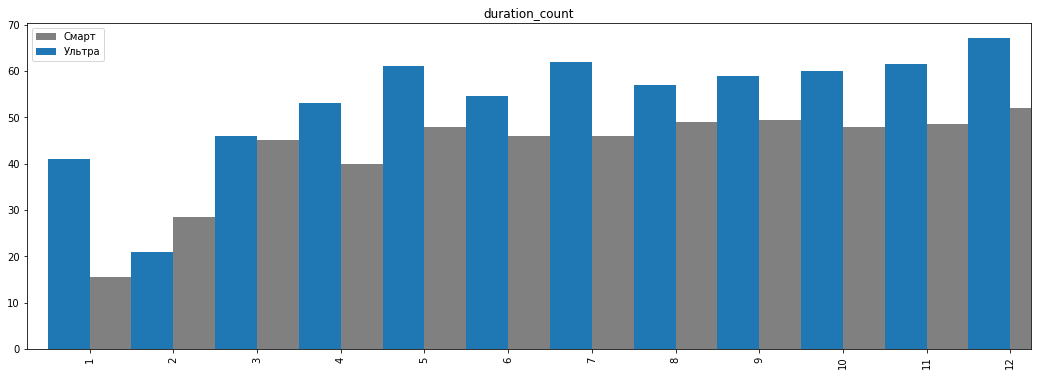

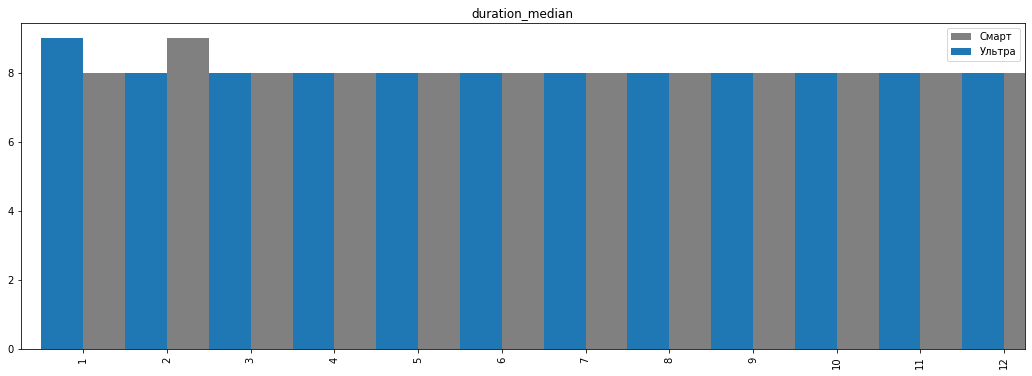

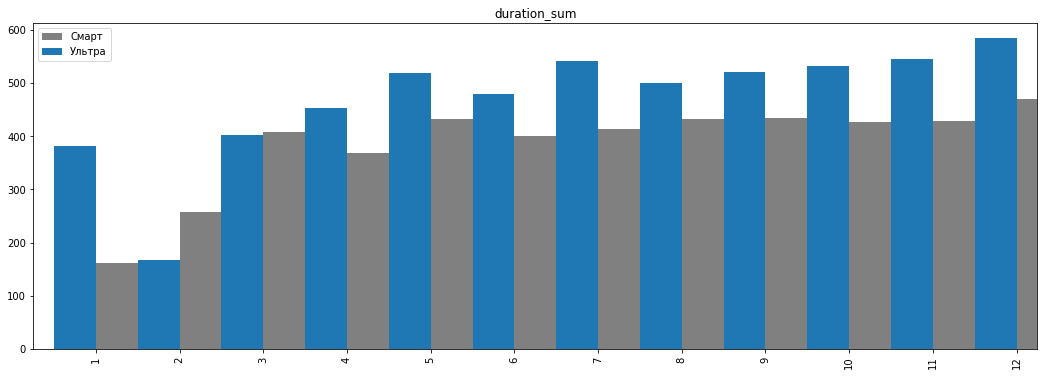

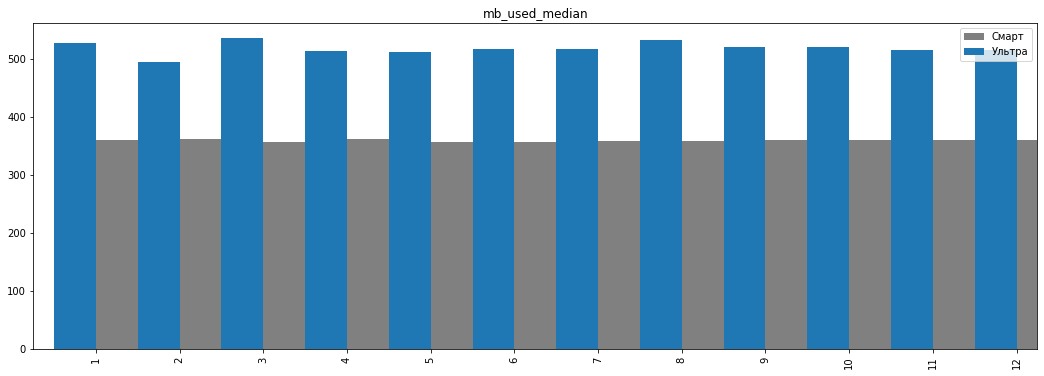

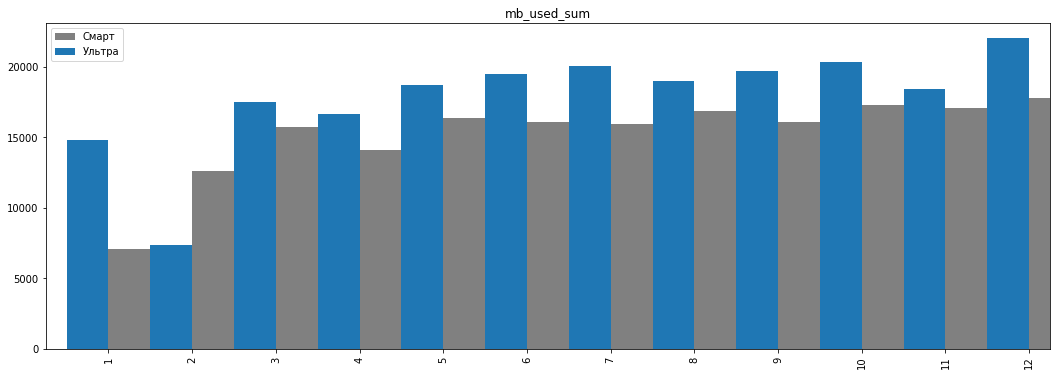

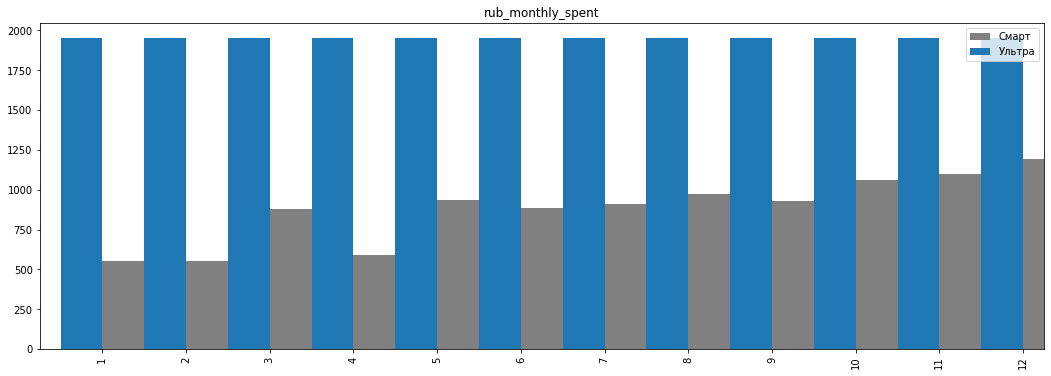

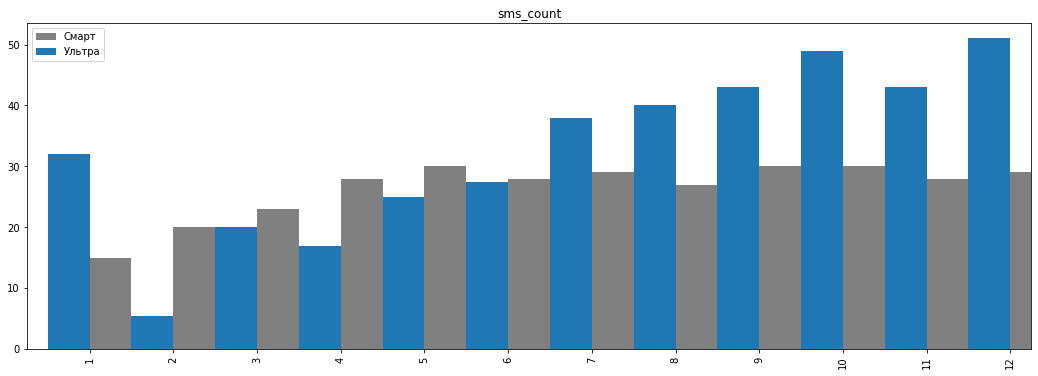

In [98]:
for i in val:
    plt.figure(figsize=(18,6))
    ax = df_pivot_months_sm[i].plot(kind = 'bar', label = 'Смарт', legend = True, position = 0, color = 'grey')
    df_pivot_months_ul[i].plot(kind = 'bar', ax = ax, label = 'Ультра', legend = True, position =1)
    plt.title (i)
    plt.legend
    
    plt.show()

Т.к., в течении года кол-во абонентов увеличивалось имеет смысл смотреть на динамику медианных значений. Длительность звонков и интернет трафик без существенных изменений, 
Количество абонентов на обоих тарифов увеличивается пропорционально (с одинаковой скоростью).
На тариф смарт пользователи потратили за год на 0,64 млн р больше. К концу года этот разрыв увеличиваается

Портрет пользователя. В среднем каждый абонент тратит в месяц 1486р, абоненты тарифа смарт - 1233, абоненты тарифа ультра - 2060р. 
В среднем пользователи смарт тратят 421 мин разговора (укладываются в тарифный план), а пользователи ультра - чуть больше - 518. Тратят интернет: смартовцы чуть больше лимита - 16 Гб, 1Гб оплачивают как превышение лимита, а ультравцы тратят почти 19 Гб. Кол-во смс не превышает лимитов, на смарте отправляют 28 смс, на ультра - 38. Особенности трат по возрастным группам не выявлены, возможно из-за недостаточности выборки
</div>

## Шаг 4. Проверка гипотез
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


Пояснить:
 - как вы формулировали нулевую и альтернативную гипотезы;
 - какой критерий использовали для проверки гипотез и почему.

H_0 - средняя выручка обоих тарифов одинаковая
H_1 - средняя выручка обоих тарифов не одинаковая

In [99]:
df_smart = df.loc[df['tariff'] == 'smart']
df_smart['rub_monthly_spent'].mean()

1233.0430318105382

In [100]:
df_ultra = df.loc[df['tariff'] == 'ultra']
df_ultra['rub_monthly_spent'].mean()

2060.417871688007

In [101]:
alpha = 0.05
results = st.ttest_ind(
    df_smart['rub_monthly_spent'], 
    df_ultra['rub_monthly_spent'])

results.pvalue


6.129437607155033e-191

Pvalue существенно ниже alpha, т.е., вероятность того, что нулевая гипотеза может быть верна очень низная. Нулевую гипотезу мы отвергаем в пользу альтернативной

H_0 - средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов;
H_1- средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов;

In [102]:
df_Moscow = df.loc[df['city'] == 'Москва']
df_other_city = df.loc[df['city'] != 'Москва']
df_Moscow ['rub_monthly_spent'].mean()                  

1507.276761968085

In [103]:
df_other_city ['rub_monthly_spent'].mean() 

1481.8855588711613

In [104]:
alpha = 0.05
results = st.ttest_ind(
    df_Moscow['rub_monthly_spent'], 
    df_other_city['rub_monthly_spent'])

results.pvalue

0.4712668200760739

P-value существенный, вероятность случайного результата нулевой гипотезы в данной выборки очень мала. Нулевую гипотезу принимаем

## Шаг 5. Общий вывод

1. Подготовка данных:
     - даты приведены в формат дат, выделены месяцы;
     - пустые значения в датах заполнены 0;
     - для расчетов исключаем нулевые данные - длительность звонков и интернет трафик;
     - таблицы звонки, сообщения и интернет агрегированы по сущности пользователь-месяц и объединены в одну таблицу с пользователями и тарифами;
     - рассчитан столбец выручка по каждому пользоваателю в месяц с учетом тарифа и превышения лимитов;


2. Анализ данных:
     - различия в тарифах - пользователи тарифа смарт делают на 11 звонков в месяц меньше (-90 мин), но продолжительность звонков одинаковая - 7-8 мин. Смартовцы всего на 15% меньше используют интернет трафика, отправляют на 26% меньше смс, и тратят на связь на 50% меньше - 925р vs 1950р;
     - Количество абонентов на обоих тарифов увеличивается пропорционально (с одинаковой скоростью), но прирост дохода на тарифе смарт существенно выше -на тариф ультра пользователи потратили за год на 0,64 млн р больше. К концу года этот разрыв увеличиваается
     - сравнение Москвы, Санкт-Петербурга и прочих городов - доля абонентов ультра больше в Москве - 32%, и существенно ниже в Санкт-Петербурге - всего 23%, длительность звонка во всех группах одинаковая 7,7 - 7,8 мин; в прочих городах пишут больше смс, а в Санкт-Петербурге мньше - 34,5 vs 21; в тарифе смарт питерцы выходят за лимитный трафик интернета, и поэтому их затраты на связь больше. 
     - построены графики по медианным значениям звонков, интернет трафика и смс, рассчитаны дисперсия и стандартное отклонение. Для показателей среднее значение смс и особенно интернет трафика дисперсия значительная, говорит о существенном разбросе данных. Для длительности звонка дисперсия менее значительна.
     - в среднем каждый абонент тратит в месяц 1486р, абоненты тарифа смарт - 1233, абоненты тарифа ультра - 2060р. Пользователи смарт превышают лимит использования интернета, Минуты разговора и кол-во смс не превышает лимиты, за них пользователи не доплачивают.
3. Проверка гипотез     
     - Гипотеза о том, что средняя выручка обоих тарифов одинаковая не подтвердилась. Принимаем альтернативную гипотезу - средняя выручка разная;
     - Зато гипотезу о одинаковой средней выручки для Москвы и других городов принимаеи, pvalue существенный - 40%.
     
     